In [1]:
# Init
import random

import arid
from PIL import ImageDraw, Image
from IPython.display import display
wps = arid.get_wps("/home/justin/Desktop/arid-dataset")

In [6]:
# Count the number of instances of each category
import json

cat_cnt = {}
for wp in wps:
    img_paths = wp.rgb_image_paths()
    for img_path in img_paths:
        annotations = wp.get_annotations(img_path.stem)['annotations']
        for annotation in annotations:
            if annotation['id'] is not None:
                lbl = "_".join(annotation['id'].split('_')[:-1])
                if cat_cnt.get(lbl) is None:
                    cat_cnt[lbl] = 0
                cat_cnt[lbl] = cat_cnt[lbl] + 1
                
cat_cnt = {k: v for k,v in  sorted(cat_cnt.items(), key=lambda x: x[1])}

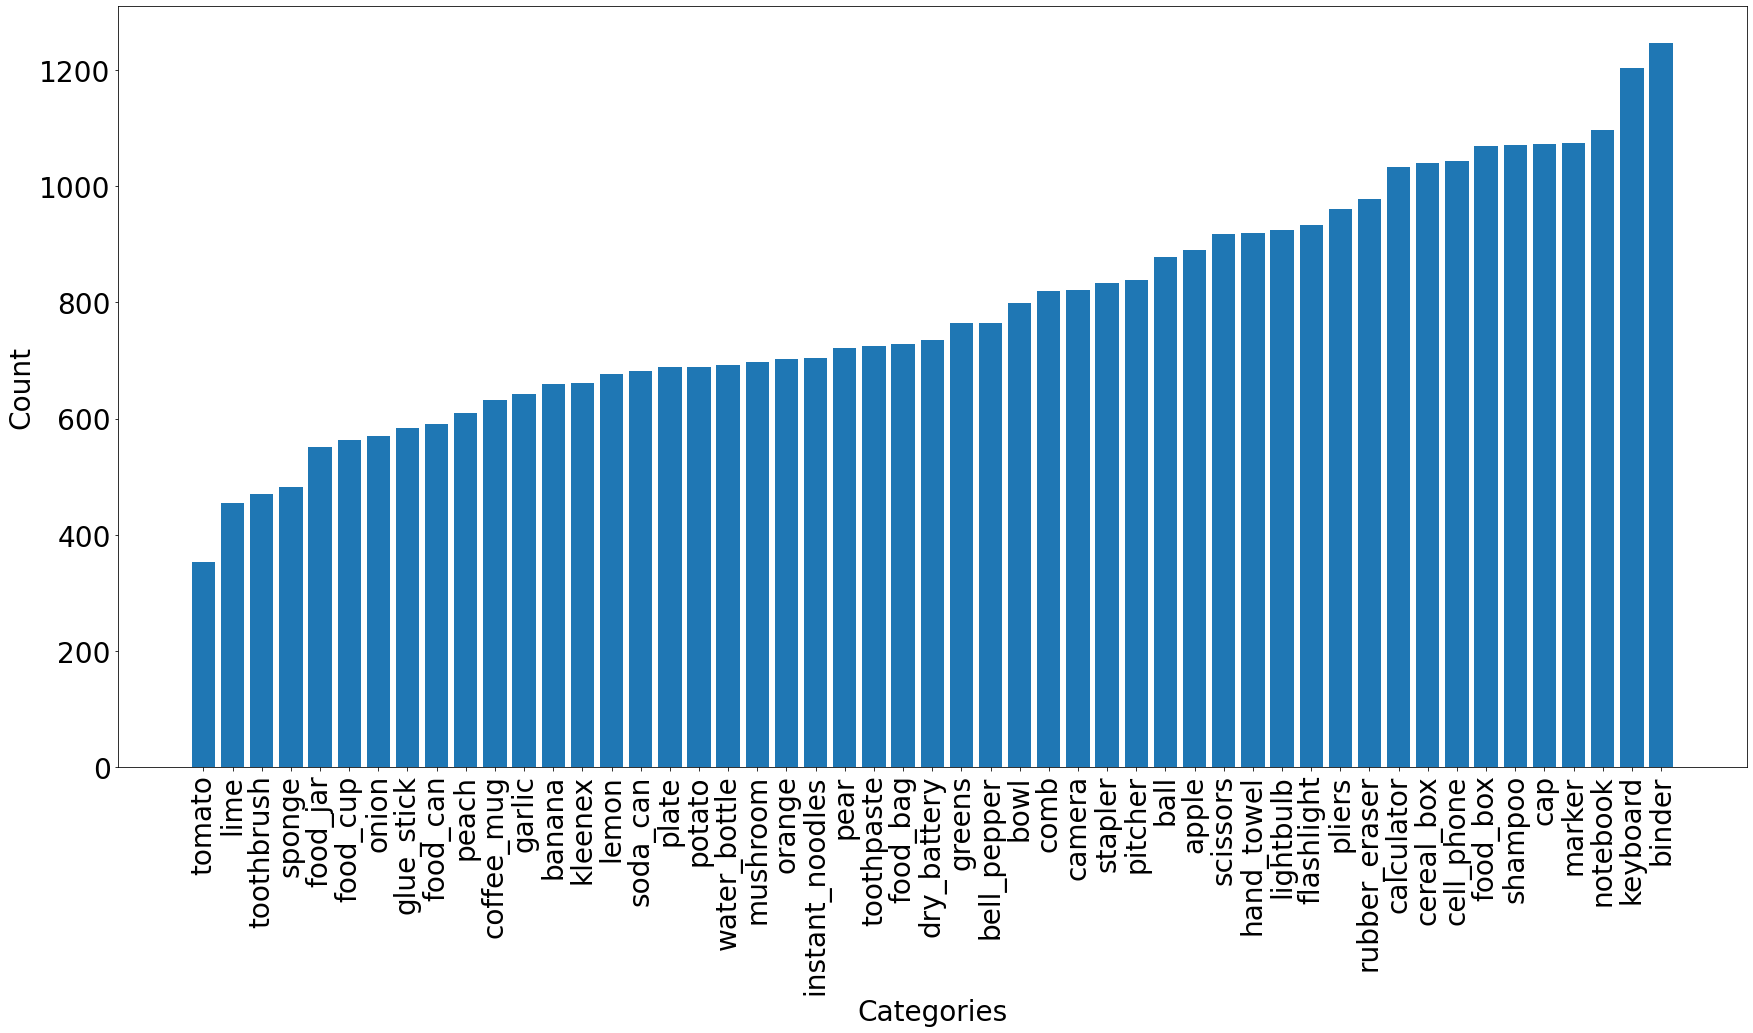

In [7]:
# Plot Object Instance count
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 28}

plt.rc('font', **font)

plt.bar(range(len(cat_cnt)), list(cat_cnt.values()), align='center')
plt.xticks(range(len(cat_cnt)), list(cat_cnt.keys()), rotation='vertical')
plt.ylabel('Count')
plt.xlabel('Categories');

plt.tight_layout()

#plt.show()
plt.savefig('object_instance_count.png')

In [9]:
# Copy crops to aggregate folder
from pathlib import Path
from shutil import copyfile
import os

crop_root = Path('/home/justin/Desktop/arid-crops')

for wp in wps:
    rgb_root = Path(wp.get_rgb_root())
    crops = Path(rgb_root / 'crops')
    
    for obj in crops.iterdir():
        obj_instance_id = obj.stem
        obj_root = Path(crop_root / obj_instance_id)
        
        if not obj_root.exists():
            os.mkdir(obj_root)
        
        for img in obj.iterdir():
            img_id = img.stem
            filename = f'{wp.get_title()}-{img_id}.png'
            copyfile(img, Path(obj_root / filename))

KeyboardInterrupt: 

In [28]:
# Get s
from pathlib import Path
from PIL import Image

def filter_crops(crop_root, object_name, size):
    sizes = {}

    for obj in crop_root.iterdir():
        obj_instance_id = obj.stem

        if obj_instance_id.startswith(object_name):
            for img in Path(crop_root / obj_instance_id).iterdir():
                i = Image.open(img)
                h, w = i.size
                if h*w > size:
                    sizes[img] = h*w

    sizes = {k: v for k,v in sorted(sizes.items(), key=lambda x: x[1], reverse=True)}
    return sizes

In [31]:
crop_root = Path('/home/justin/Desktop/arid-crops')
object_name = 'lemon'
s = filter_crops(crop_root, object_name, 600)
print(list(s.values()))
print(len(s))

[9483, 8798, 8343, 8272, 8232, 7840, 7719, 7644, 7560, 6525, 5148, 4830, 4662, 4620, 4599, 4488, 4488, 4488, 4422, 4290, 4290, 4160, 4140, 4095, 4080, 4032, 3969, 3969, 3953, 3844, 3844, 3835, 3770, 3721, 3721, 3721, 3720, 3660, 3654, 3600, 3599, 3596, 3596, 3596, 3588, 3550, 3540, 3534, 3472, 3420, 3416, 3337, 3304, 3300, 3283, 3216, 3185, 3111, 3078, 3072, 3050, 3050, 3021, 3008, 2961, 2940, 2914, 2914, 2856, 2852, 2829, 2806, 2790, 2790, 2745, 2745, 2745, 2744, 2744, 2700, 2700, 2688, 2684, 2679, 2655, 2646, 2640, 2640, 2632, 2632, 2585, 2585, 2585, 2565, 2548, 2478, 2475, 2475, 2430, 2419, 2419, 2419, 2394, 2394, 2394, 2352, 2352, 2352, 2346, 2346, 2288, 2288, 2279, 2254, 2240, 2236, 2236, 2236, 2226, 2209, 2205, 2205, 2200, 2193, 2193, 2162, 2160, 2142, 2142, 2132, 2090, 2052, 2021, 2016, 2000, 1980, 1974, 1974, 1974, 1968, 1968, 1960, 1950, 1938, 1936, 1935, 1932, 1927, 1914, 1908, 1892, 1892, 1890, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1872, 1849, 1849, 1848, 1848, 184

In [32]:
a = [1,2,3,4,5]
a*5

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [4]:
# Copy arid imgs to directory for floyd.
from pathlib import Path
from shutil import copyfile
import os

root = Path('/home/justin/Desktop/arid-floyd')

for wp in wps:
    rgb_root = Path(wp.get_rgb_root())
    wp_path = Path(root / wp.get_title())
    if not wp_path.exists():
        os.mkdir(wp_path)
    
    for img_path in rgb_root.iterdir():
        if img_path.is_file():
            img_id = img_path.stem
            copyfile(img_path, Path(wp_path / f'{img_id}.png'))